# Temporal Convolutional Networks
* https://unit8.com/resources/temporal-convolutional-networks-and-forecasting/


# ※ 以下のサンプルコードたちは、paddingがleft paddingではないので、データリークを引き起こしている！！！

# About Temporal Convolutional Networks
Temporal Convolutional Networks (TCNs) are a type of neural network architecture specifically designed to hadle sequence modeling tasks. They are particularly effective for time series data where the goal is to predict future values based on past observations. TCNs provide an alternative to Recurrent Neural Networks (RNNs) and Long Short-Term Memory networks (LSTMs), offering certain advantages in terms of trainig efficiency and parallel computation capabilities.

## Key Features of TCNs
1. **Convolutional Structure**:
    * Unlike RNNs, TCNs use convolutional layers to process sequential data. This means they apply convolutions across the temporal dimension of the data, extracting patterns at various scales.
2. **Causal(因果的な) Convolutions**:
    * TCNs ensure that the prediction for a current time step can depend only on past and present data, not future data. This is achieved through causal convolutions,  where the output at time $t$ is convolved only with elements from time $t$ or earlier in the input sequence.
3. **Dilated(拡張した) Convolutions**:
    * To capture long-range dependencies in data without the need for many layers or large filters, TCNs use dilated convolutions. A dilation factor increase the space between each element in the filter. For example, a 1-dilated convolution takes adjacent(隣接した) entries, a 2-dilated convolution skips one entry between each input, a 4-dilated convolution skip three, and so on. This allows the network to grow the receptive field exponentially and cover a large input history with fewer layers.
4. **Residual Connections**:
    * TCNs often include residual connections, where the input to a layer is added to its output. This helps in training deeper networks by alleviating(緩和する) the vanishing gradient problem and enabling faster convergence.

## Advantages of TCNs
* **Parallelism**: Unlike RNNs, which must process data sequentially (because the output from one step is the input to the next), TCNs can process all data points simultaneously during training, which speeds up computations.
* **Flexible Receptive Field**: The use of dilated convolutions allows TCNs to efficiently adjust their receptive field to capture relevant information from the input sequence, making them suitable for tasks with varying input sizes and dependency lengths.
* **Stability in Training**: TCNs avoid some of the training difficulties associated with RNNs, such as gradient vanishing and exploding problems, thanks to their convolutional nature and the incorporation of residual connections.

## Applications
TCNs are versatile and can be applied in a wide range of sequence modeling tasks such as:
* Time Series Forecasting: Predicting future stock prices, weather conditions, or energy consumption.
* Audio Processing: Generating music or speech synthesis.
* Language Modeling: Predicting the next word in a sentence or generating text.


Overall, TCNs offer a robust framework for handling various types of sequential data, providing both efficiency and effectiveness in capturing temporal dependencies.

# The meaning of `Channel` in TCN context
In the context of Temporal Convolutional Networks (TCNs), the term "channel" has a similar connotation to its usage in CNNs but is adapted for one-dimensional sequential data instead of two-dimensional image data. Here's how channels are used in TCNs:

1. **Definition and Role**:
   - In TCNs, each channel still represents a separate feature dimension of the input data. For time series data, each channel could be a different measurable feature at each time step. For example, in a financial time series, you might have different channels for open price, close price, volume, and other technical indicators.

2. **Input and Output Channels**:
   - **Input Channels**: These are similar to the depth in CNNs, referring to the number of distinct features or time-dependent variables your model inputs at each time step. If your time series data includes temperature, humidity, and wind speed as features, then your input would have three channels.
   - **Output Channels**: This defines the number of features the TCN aims to predict. For instance, if the goal is to predict both future temperature and humidity, the output would consist of two channels.

3. **Feature Learning**:
   - As with CNNs, in TCNs, filters (or kernels) are applied across the channels, but they move along the time axis. This convolution operation helps in capturing temporal dependencies and patterns across different time steps and across all input features.
   - The network can learn to understand how different features influence each other over time, which is crucial for making accurate predictions in time series analysis.

### Example
Imagine you're using a TCN to predict future stock prices based on historical data. You might set up your model with the following channels:
- **Input Channels**:
  - Channel 1: Closing price of the stock
  - Channel 2: Trading volume
  - Channel 3: 10-day moving average of the closing price
  - Channel 4: Relative Strength Index (RSI)
  
- **Output Channel**:
  - Future predicted closing price of the stock

Here, each input channel represents a different aspect of the stock's historical data, allowing the TCN to learn complex patterns and relationships between price, volume, moving averages, and market sentiment indicators like the RSI. The output is a single channel because you're predicting one feature: the future closing price.

This setup allows the TCN to leverage multiple features to make informed predictions, capturing both short-term fluctuations and long-term trends in the stock's price.

# Example 1
Creating a synthetic dataset for a sample TCN model in PyTorch involves generating data that might simulate the real-world characteristics of the desired features: daily sales of Amazon, SPY's (an ETF that tracks the S&P 500) price, and the past closing price of Amazon stock. I'll also create a simple TCN model to predict the future price of Amazon stock based on these features.

## Step 1: Generate Synthetic Data
We'll create synthetic data where:
* Daily sales of Amazon (**sales**) will be simulated as a random walk.
* SPY's price (**spy_price**) will be simulated similarly but will have a slight upward trend.
* Past closing price of Amazon (**amzn_close**) will be simulated with a mix of trend and noise.

## Step 2: Build a Simple TCN Model
We'll use a basic TCN model with causal and dilated convolutions, which PyTorch doesn't natively support in its standard modules, but we can implement a simple version.

## Step 3: Define the Training Loop
We will set up a basic training loop using mean squared error as the loss function and an optimizer to update the model weights.

Here is the full implementation:

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate synthetic data
np.random.seed(0)
data_length = 1000
sales = np.random.randn(data_length).cumsum()  # Random walk for daily sales
spy_price = np.random.randn(data_length) * 2 + np.arange(data_length) * 0.02  # Slightly upward trending
amzn_close = np.random.randn(data_length) * 2 + np.arange(data_length) * 0.05  # More upward trending

# Combining the features
features = np.stack((sales, spy_price, amzn_close), axis=1)
targets = amzn_close + np.random.randn(data_length) * 0.5  # Next day price

# Normalization
# features = (features - features.mean()) / features.std()

display(features.shape, targets.shape)
display(features[:10])
display(targets[:10])

(1000, 3)

(1000,)

array([[ 1.76405235,  1.11192536, -3.06584211],
       [ 2.16420955,  1.80494777, -3.37394033],
       [ 3.14294754, -0.80462965,  0.19227012],
       [ 5.38384074,  0.26942806, -1.76674896],
       [ 7.25139873,  0.53610665,  0.03837677],
       [ 6.27412085,  0.50295989, -1.15771807],
       [ 7.22420927,  1.20154717, -1.2415686 ],
       [ 7.07285206, -3.49615526, -0.61169068],
       [ 6.96963321,  0.06135186,  1.80717111],
       [ 7.38023171,  0.6580672 ,  2.3082903 ]])

array([-2.2692053 , -3.08957913,  0.1350266 , -1.64093384, -0.56705104,
       -1.35458493, -1.19894231, -0.56197969,  1.04186299,  2.47210189])

In [ ]:
# Define sequence length
seq_len = 10

# Reshape data to include sequences
batch_features = []
batch_targets = []
for i in range(len(features) - seq_len):
    batch_features.append(features[i:i+seq_len]) # Collect a sequence of `seq_len` days
    batch_targets.append(targets[i + seq_len]) # Target is the next day after the sequence


# Convert to PyTorch tensors
batch_features = torch.FloatTensor(np.array(batch_features))
batch_targets = torch.FloatTensor(batch_targets)

print(batch_features.shape, batch_targets.shape)

torch.Size([990, 10, 3]) torch.Size([990])


* bacht_featuresの構成：
    * [batch_size, sequence_length, features]

In [ ]:
# Define the TCN model
class TCN(nn.Module):
    def __init__(self, num_channels, kernel_size=2, dropout=0.2):
        super(TCN, self).__init__()
        self.tcn = nn.Sequential(
            nn.Conv1d(in_channels=3, out_channels=num_channels, kernel_size=kernel_size, padding=(kernel_size-1), dilation=1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Conv1d(in_channels=num_channels, out_channels=1, kernel_size=kernel_size, padding=(kernel_size-1), dilation=2),
            nn.ReLU()
        )

    def forward(self, x):
        # Transpose to match input shape for Conv1D (batch_size, channels, seq_len)
        x = x.transpose(1, 2)
        x = self.tcn(x)
        return x[:, :, -1]  # Return the last output for prediction

In [ ]:
# Model, Loss, and Optimizer
model = TCN(num_channels=16)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Prepare data (simple batch processing for demonstration)
batch_size = 32
num_batches = len(batch_features) // batch_size

In [ ]:
# 1batchの構成確認用
for i in range(num_batches):  # This ensures all batches are accounted for
    start = i * batch_size
    end = start + batch_size
    features_batch = batch_features[start:end]
    targets_batch = batch_targets[start:end]
    break
print(features_batch.shape)

torch.Size([32, 10, 3])


In [ ]:
# Training Loop
for epoch in range(30):
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        features_batch = batch_features[start:end]
        targets_batch = batch_targets[start:end]

        # Model predictions
        pred = model(features_batch).squeeze()
        loss = criterion(pred, targets_batch)

        if batch_features.size(0) < batch_size:  # Check if the actual batch size is less than the planned size
            continue  # Skip this batch or you could pad it to match the batch size

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 2217.3544921875
Epoch 2, Loss: 2170.201171875
Epoch 3, Loss: 1483.969482421875
Epoch 4, Loss: 826.7750244140625
Epoch 5, Loss: 224.6765594482422
Epoch 6, Loss: 96.8548583984375
Epoch 7, Loss: 52.04771041870117
Epoch 8, Loss: 89.89236450195312
Epoch 9, Loss: 68.05911254882812
Epoch 10, Loss: 81.3582992553711
Epoch 11, Loss: 61.36957931518555
Epoch 12, Loss: 85.46270751953125
Epoch 13, Loss: 67.1821060180664
Epoch 14, Loss: 63.27079391479492
Epoch 15, Loss: 53.337547302246094
Epoch 16, Loss: 78.55711364746094
Epoch 17, Loss: 86.52130889892578
Epoch 18, Loss: 64.4120101928711
Epoch 19, Loss: 67.43480682373047
Epoch 20, Loss: 74.61274719238281
Epoch 21, Loss: 67.59249114990234
Epoch 22, Loss: 44.99803924560547
Epoch 23, Loss: 80.79122161865234
Epoch 24, Loss: 82.41255950927734
Epoch 25, Loss: 68.31673431396484
Epoch 26, Loss: 54.08013916015625
Epoch 27, Loss: 71.92587280273438
Epoch 28, Loss: 84.6698989868164
Epoch 29, Loss: 83.53269958496094
Epoch 30, Loss: 62.882080078125


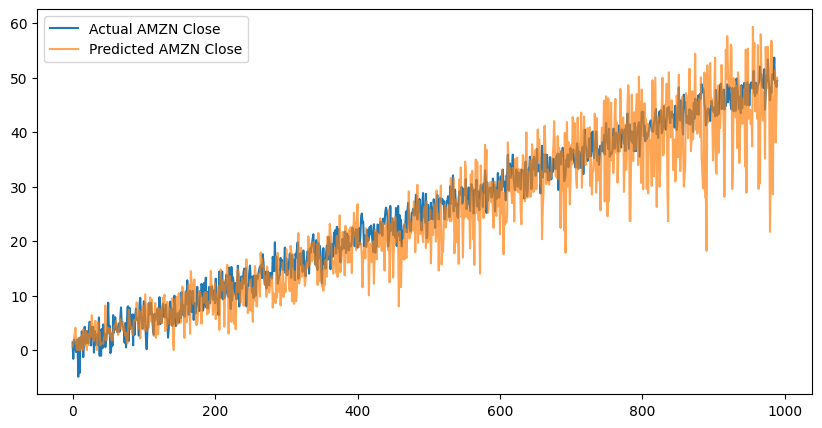

In [ ]:
# Plot results
test_output = model(batch_features).detach().numpy().flatten()
plt.figure(figsize=(10, 5))
plt.plot(batch_targets.numpy(), label='Actual AMZN Close')
plt.plot(test_output, label='Predicted AMZN Close', alpha=0.7)
plt.legend()
plt.show()

## the contents of `class TCN(nn.Module)`
```python
class TCN(nn.Module):
    def __init__(self, num_channels, kernel_size=2, dropout=0.2):
        super(TCN, self).__init__()
        self.tcn = nn.Sequential(
            nn.Conv1d(in_channels=3, out_channels=num_channels, kernel_size=kernel_size, padding=(kernel_size-1), dilation=1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Conv1d(in_channels=num_channels, out_channels=1, kernel_size=kernel_size, padding=(kernel_size-1), dilation=2),
            nn.ReLU()
        )

    def forward(self, x):
        # Transpose to match input shape for Conv1D (batch_size, channels, seq_len)
        x = x.transpose(1, 2)
        x = self.tcn(x)
        return x[:, :, -1]  # Return the last output for prediction
```

Let's dive deeper into the `TCN` class defined in the modified PyTorch code, explaining each part step by step, focusing on the parameters and how the shape of the tensor changes through the layers.

### Class Definition
```python
class TCN(nn.Module):
```
- The `TCN` class inherits from `nn.Module`, which is the base class for all neural network modules in PyTorch. This inheritance is required to use PyTorch's functionalities like training, parameter management, etc.

### Constructor
```python
    def __init__(self, num_channels, kernel_size=2, dropout=0.2):
        super(TCN, self).__init__()
```
- The constructor initializes the parent class and sets up the parameters and layers used in the network.
- **Parameters**:
  - `num_channels`: The number of output channels for the convolutional layers. This defines the number of features or "filters" the layer will learn to detect.
  - `kernel_size`: The size of the kernel (filter) used in convolutional layers. A kernel size of 2 means each convolution operation uses 2 consecutive data points.
  - `dropout`: A regularization technique where randomly selected neurons are ignored during training to prevent overfitting.

### Layers Defined in Sequential Container
```python
        self.tcn = nn.Sequential(
            nn.Conv1d(in_channels=3, out_channels=num_channels, kernel_size=kernel_size, padding=(kernel_size-1), dilation=1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Conv1d(in_channels=num_channels, out_channels=1, kernel_size=kernel_size, padding=(kernel_size-1), dilation=2),
            nn.ReLU()
        )
```
- `nn.Sequential`: A module that contains other modules (layers), and applies them in sequence to produce an output.
- **Layers**:
  - `nn.Conv1d`: Performs 1-dimensional convolution.
    - `in_channels`: Number of input channels. Initially 3, as we have three features.
    - `out_channels`: Number of output channels; first layer uses `num_channels`, second reduces it to 1.
    - `kernel_size`: The size of the moving filter or kernel.
    - `padding`: Ensures the output size is the same as the input size, enabling the network to learn at every edge of the input sequence. The padding size of `(kernel_size-1)` is typically used to compensate for the reduction in sequence size due to the kernel size.
    - `dilation`: Specifies the spacing between kernel elements. It increases the field of view of the kernel by skipping `dilation - 1` points between each point in the input.
  - `nn.ReLU`: A non-linear activation function that introduces non-linear properties to the model.
  - `nn.Dropout`: Randomly zeros some of the elements of the output tensor with probability equal to the `dropout` rate, at each training step.

### Forward Method
```python
    def forward(self, x):
        x = x.transpose(1, 2)  # Transpose to match input shape for Conv1D (batch_size, channels, seq_len)
        x = self.tcn(x)
        return x[:, :, -1]  # Return the last output for prediction
```
- **Processing**:
  - `x.transpose(1, 2)`: The input tensor `x` is expected to be of shape `(batch_size, seq_len, num_features)`. It needs to be transposed to `(batch_size, num_features, seq_len)` because `nn.Conv1d` expects the channels (features) as the second dimension.
  - `self.tcn(x)`: The data passes through the sequential layers defined earlier.
  - `return x[:, :, -1]`: Returns the last element in the sequence from each batch. This is typical for sequence forecasting where you predict the next value.

### Tensor Shapes Through Each Step
- **Input Shape**: `(batch_size, seq_len, num_features)` -> After transpose: `(batch_size, num_features, seq_len)`
- **After First Conv1d**: `(batch_size, num_channels, seq_len)` (same seq_len due to padding)
- **After Second Conv1d**: `(batch_size, 1, seq_len)` (again, same seq_len due to padding)
- **Output Shape**: `(batch_size, 1)` (only the last time step is selected)

Each parameter and layer is designed to extract and process temporal features from the sequence data effectively, enabling the model to learn from both the immediate and more extended patterns in the input data.

## The Shape of each tensor in each step in class TCN()

### Initial Input
Suppose the input batch **x** has the shape **(batch_size, seq_len, num_features)**, where:
* **batch_size** is the number of samples in a batch.
* **seq_len** is the length of the sequence for each sample.
* **num_features** is the number of features per time step (in this case, 3 for daily sales of Amazon, SPY's price, and past close price of Amazon).

**Example**: If **batch_size=32**, **seq_len=100**, and **num_features=3**, then the initial shape of **x** would be **(32, 100, 3)**.

### Step-by-Step Shape Transformation
#### 1. **Transpose Operation**
```python
x = x.transpose(1, 2)  # Transpose to match input shape for Conv1D (batch_size, channels, seq_len)
```

* After transposition, the shape of **x** changes from **(batch_size, seq_len, num_features)** to **(batch_size, num_features, seq_len)**. In our example, it becomes **(32, 3, 100)**.

#### 2. **First Convolutional Layer**
```python
nn.Conv1d(in_channels=3, out_channels=num_channels, kernel_size=kernel_size, padding=(kernel_size-1), dilation=1)
```
* This layer performs a convolution over the temporal dimension (**seq_len**). Given **num_channels** as the number of output channels and a **kernel_size** of 2:
    * **in_channel=3**: Number of input channels.
    * **out_channels=num_channesl**: Let's say **num_channels=16**.
    * The padding is set to **(kernel_size-1)**, which is 1 in this case. This padding ensures that the output length in the temporal dimension remains the same as the input if **stride** is 1.

* Therefore, the output shape after this layer would still be **(batch_size, num_channels, seq_len)** due to the padding. If **seq_len=100**, the shape becomes **(32, 16, 100)**.

#### 3. **ReLU Activation and Dropout**

* **nn.ReLU()** and **nn.Dropout(dropout)** do not alter the shape of the tensor. They operate element-wise, so the shape remains **(32, 16, 100)**.

#### 4. **Second Convolutional Layer**
```python
nn.Conv1d(in_channels=num_channels, out_channels=1, kernel_size=kernel_size, padding=(kernel_size-1), dilation=2)
```
* **in_channels=num_channels=16**
* **out_channels=1**: This is typically set to 1 for making single-step predictions in time series.
* **padding=(kernel_size-1)=1** and **dilation=2**. The dilation increase the receptive field but doesn't change the output size due to the adjusted padding.

* The output after this second convolutional layer remains **(batch_size, 1, seq_len)**, thus **(32, 1, 100)**.

#### 5. **Final Output Selection**
```python
return x[:, :, -1]
```
* This slices the last element along the temporal dimension (for each example and each output channel), reducing the shape to **(batch_size, out_channels)**, which is **(32, 1)**. This shape represents the predicted value at the next time step for each example in the batch.


## * Using torch's Dataset & DataLoader edition

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn import Linear, Conv1d, ReLU, Dropout
from torch.nn import MSELoss
from torch.optim import Adam
import matplotlib.pyplot as plt

### Generate synthetic data
np.random.seed(0)
data_length = 1000
sales = np.random.randn(data_length).cumsum()  # Random walk for daily sales
spy_price = np.random.randn(data_length) * 2 + np.arange(data_length) * 0.02  # Slightly upward trending
amzn_close = np.random.randn(data_length) * 2 + np.arange(data_length) * 0.05  # More upward trending

# Combining the features
data = np.stack((sales, spy_price, amzn_close), axis=1)

# Normalize data
# data = (data - data.mean(axis=0)) / data.std(axis=0)

# Convert to PyTorch tensor
data = torch.tensor(data, dtype=torch.float32)

### Dataset class Definition
class StockPriceDataset(Dataset):
    def __init__(self, data, sequence_length=10):
        self.data = data
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        features = self.data[idx: idx + self.sequence_length, :]
        target = self.data[idx + self.sequence_length, 2]  # Target is next day Amazon price
        return features, target

### Hyperparameters
learning_rate = 0.001
epochs = 30
batch_size = 32
input_size = 3  # Features: Daily SPY price, Daily Sales, Past Amazon price
n_channels = 16
output_size = 1  # Predicting next day Amazon price
sequence_length = 10

### Create dataset and dataloader
train_dataset = StockPriceDataset(data[:-100], sequence_length)
val_dataset = StockPriceDataset(data[-100:], sequence_length)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

### Define the TCN model
class TCN(nn.Module):
    def __init__(self, num_channels, kernel_size=2, dropout=0.2):
        super(TCN, self).__init__()
        self.tcn = nn.Sequential(
            nn.Conv1d(in_channels=3, out_channels=num_channels, kernel_size=kernel_size, padding=(kernel_size-1), dilation=1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Conv1d(in_channels=num_channels, out_channels=1, kernel_size=kernel_size, padding=(kernel_size-1), dilation=2),
            nn.ReLU()
        )

    def forward(self, x):
        # Transpose to match input shape for Conv1D (batch_size, channels, seq_len)
        x = x.transpose(1, 2)
        x = self.tcn(x)
        return x[:, :, -1]  # Return the last output for prediction

In [ ]:
# Model, Loss, and Optimizer
model = TCN(num_channels=16)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for features, target in train_loader:
        optimizer.zero_grad()
        output = model(features)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for features, target in val_loader:
            output = model(features)
            loss = criterion(output, target)
            val_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}')

print("Training complete!")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([26])) that is different to the input size (torch.Size([26, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/30, Train Loss: 668.596640927451, Val Loss: 2215.5753580729165
Epoch 2/30, Train Loss: 516.3821509565626, Val Loss: 1482.0600992838542
Epoch 3/30, Train Loss: 312.7316085100174, Val Loss: 825.1761067708334
Epoch 4/30, Train Loss: 162.75293464320046, Val Loss: 334.5707702636719
Epoch 5/30, Train Loss: 60.07965503420149, Val Loss: 83.10018666585286
Epoch 6/30, Train Loss: 39.16191678387778, Val Loss: 18.930362065633137
Epoch 7/30, Train Loss: 37.725786737033296, Val Loss: 10.708581606547037
Epoch 8/30, Train Loss: 35.60115723950522, Val Loss: 10.16606601079305
Epoch 9/30, Train Loss: 34.795901026044575, Val Loss: 11.241693814595541
Epoch 10/30, Train Loss: 34.0266330242157, Val Loss: 9.964586734771729
Epoch 11/30, Train Loss: 32.916515180042815, Val Loss: 11.413515408833822
Epoch 12/30, Train Loss: 34.03040088926043, Val Loss: 11.680100758870443
Epoch 13/30, Train Loss: 34.44484753268106, Val Loss: 9.910805543263754
Epoch 14/30, Train Loss: 32.38817972796304, Val Loss: 7.85941410

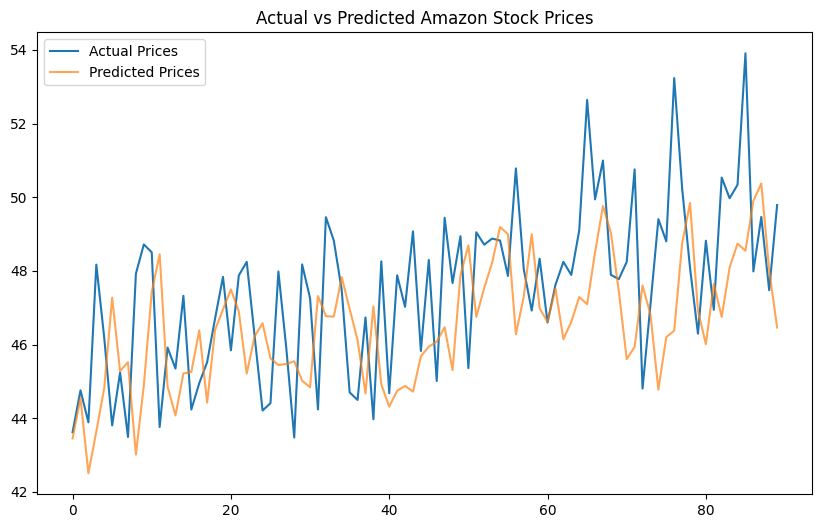

In [ ]:
import matplotlib.pyplot as plt

model.eval()
predictions = []
targets = []

with torch.no_grad():
    for features, target in val_loader:
        output = model(features)
        predictions.append(output.numpy())
        targets.append(target.numpy())

predictions = np.concatenate(predictions).flatten()
targets = np.concatenate(targets).flatten()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(targets, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Amazon Stock Prices')
plt.show()


In [ ]:
np.corrcoef(targets, predictions)

array([[1.        , 0.32131491],
       [0.32131491, 1.        ]])

# Example 2 by Gemini

Please become a Data Scientist for Finance and teach me these things.
I want to learn TCN in Deep Learning.
As a skillful Data Scientist about Finance, please give me good python code to be able to learn how to use TCN model to predict future stock price.
When making sample code, please consider following instructions.
1. make Synthetic Data
2. predict Amazon stock price
3. features are three : daily SPY price, daily sales of Amazon, and past Amazon stock prices
4. sequence length is 10
5. use pytorch library
6. make pytorch Dataset class to make sequence data
7. use pytorch DataLoader to do batch process
8. make TCN model
9. do not use nn.Sequential()

Epoch 1/30, Train Loss: 0.9956041127443314, Val Loss: 1.143746813138326
Epoch 2/30, Train Loss: 0.9922301322221756, Val Loss: 1.1487309137980144
Epoch 3/30, Train Loss: 0.9871558908905301, Val Loss: 1.1489483912785847
Epoch 4/30, Train Loss: 0.9865180764879499, Val Loss: 1.1553215980529785
Epoch 5/30, Train Loss: 0.9879357410328728, Val Loss: 1.1484280824661255
Epoch 6/30, Train Loss: 0.9887379471744809, Val Loss: 1.1516733368237813
Epoch 7/30, Train Loss: 0.9866316914558411, Val Loss: 1.1427592635154724
Epoch 8/30, Train Loss: 0.9850294653858457, Val Loss: 1.1523546775182087
Epoch 9/30, Train Loss: 0.9884229451417923, Val Loss: 1.1560915907224019
Epoch 10/30, Train Loss: 0.9847502069813865, Val Loss: 1.142410159111023
Epoch 11/30, Train Loss: 0.9851381778717041, Val Loss: 1.1511272390683491
Epoch 12/30, Train Loss: 0.9867275868143354, Val Loss: 1.15406996011734
Epoch 13/30, Train Loss: 0.9814206681081227, Val Loss: 1.146348774433136
Epoch 14/30, Train Loss: 0.9795352901731219, Val Los

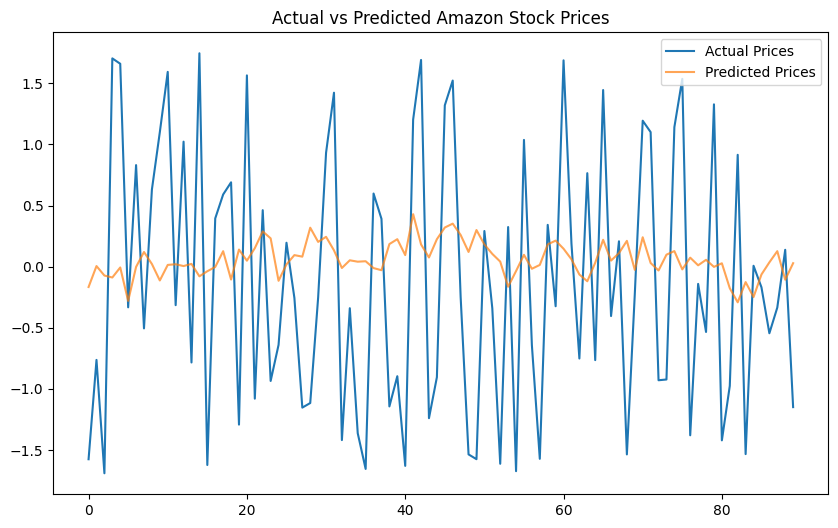

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn import Linear, Conv1d, ReLU, Dropout, MSELoss
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt

class TCNBlock(torch.nn.Module):
    def __init__(self, input_size, n_channels, kernel_size=3, dropout=0.2):
        super(TCNBlock, self).__init__()
        pad = (kernel_size - 1) * 2  # Adjust padding to maintain the same dimension after dilation
        self.conv1 = Conv1d(in_channels=input_size, out_channels=n_channels, kernel_size=kernel_size, padding=pad)
        self.relu1 = ReLU()
        self.dropout1 = Dropout(p=dropout)
        self.dilated_conv = Conv1d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=pad, dilation=2)
        self.relu2 = ReLU()
        self.dropout2 = Dropout(p=dropout)
        self.skip_conn = Conv1d(in_channels=input_size, out_channels=n_channels, kernel_size=1, padding=0)

    def forward(self, x):
        residual = self.skip_conn(x)
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.dilated_conv(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        return x[:, :, :residual.size(2)] + residual  # Trim x to match residual size if needed

class StockPriceDataset(Dataset):
    def __init__(self, data, sequence_length=10):
        self.data = data
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        features = self.data[idx: idx + self.sequence_length, :-1]
        target = self.data[idx + self.sequence_length, -1]  # Target is next day Amazon price
        return features, target

class TCNModel(torch.nn.Module):
    def __init__(self, input_size, n_channels, output_size, num_blocks=4, dropout=0.2):
        super(TCNModel, self).__init__()
        self.layers = torch.nn.ModuleList()
        self.layers.append(Conv1d(in_channels=input_size, out_channels=n_channels, kernel_size=1))
        for _ in range(num_blocks):
            self.layers.append(TCNBlock(n_channels, n_channels, dropout=dropout))
        self.fc = Linear(n_channels, output_size)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        # x = x.mean(dim=2)  # Average across the sequence length dimension
        x = x[:, :, -1]
        return self.fc(x)

# Hyperparameters
learning_rate = 0.001
epochs = 30
batch_size = 32
input_size = 3  # Features: Daily SPY price, Daily Sales, Past Amazon price
n_channels = 16
output_size = 1  # Predicting next day Amazon price
sequence_length = 10

# Generate synthetic data
np.random.seed(42)
torch.manual_seed(42)
n_samples = 1000

spy_prices = np.random.rand(n_samples, 1) * 1000  # Daily SPY prices
amazon_sales = np.random.rand(n_samples, 1) * 1000  # Daily sales of Amazon
amazon_prices = np.random.rand(n_samples, 1) * 2000  # Past Amazon prices
next_day_amazon_prices = np.random.rand(n_samples, 1) * 2000  # Next day Amazon prices as target

# Combine features
data = np.hstack((spy_prices, amazon_sales, amazon_prices, next_day_amazon_prices))

# Normalize data
data = (data - data.mean(axis=0)) / data.std(axis=0)

# Convert to PyTorch tensor
data = torch.tensor(data, dtype=torch.float32)

# Create dataset and dataloader
train_dataset = StockPriceDataset(data[:-100], sequence_length)
val_dataset = StockPriceDataset(data[-100:], sequence_length)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Model definition
model = TCNModel(input_size, n_channels, output_size)

# Optimizer and loss function
criterion = MSELoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for features, target in train_loader:
        optimizer.zero_grad()
        output = model(features.permute(0, 2, 1))  # Change shape to (batch_size, input_size, sequence_length)
        loss = criterion(output.squeeze(), target)  # Adjust the shape of the output and target
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for features, target in val_loader:
            output = model(features.permute(0, 2, 1))
            loss = criterion(output.squeeze(), target)  # Adjust the shape of the output and target
            val_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}')

print("Training complete!")

# Evaluate the model
model.eval()
predictions = []
targets = []

with torch.no_grad():
    for features, target in val_loader:
        output = model(features.permute(0, 2, 1))
        predictions.append(output.numpy())
        targets.append(target.numpy())

predictions = np.concatenate(predictions).flatten()
targets = np.concatenate(targets).flatten()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(targets, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Amazon Stock Prices')
plt.show()


## Explain `TCNmodel`

### TCNBlock Class
The **TCNBlock class represents a single block in a Temporal Convolutional Network(TCN).

#### `__init__` Method
```python
class TCNBlock(torch.nn.Module):
    def __init__(self, input_size, n_channels, kernel_size=3, dropout=0.2):
        super(TCNBlock, self).__init__()
        pad = (kernel_size - 1) * 2  # Adjust padding to maintain the same dimension after dilation
        self.conv1 = Conv1d(in_channels=input_size, out_channels=n_channels, kernel_size=kernel_size, padding=pad)
        self.relu1 = ReLU()
        self.dropout1 = Dropout(p=dropout)
        self.dilated_conv = Conv1d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=pad, dilation=2)
        self.relu2 = ReLU()
        self.dropout2 = Dropout(p=dropout)
        self.skip_conn = Conv1d(in_channels=input_size, out_channels=n_channels, kernel_size=1, padding=0)
```
* **pad = (Kernel_size - 1) * 2**: This calculates the padding required to maintain the input dimension after applying a dilated convolution. The padding ensures that the spatial dimensions of the output remain the same as the input.
* **self.conv1**: This is the first convolutional layer with a specified kernel size and padding. It transforms the input from **input_size** channes to **n_channels** channels.
* **self.relu1**: ReLU activation function applied after the first convolution to introduce non-linearity.
* **self.dropout1**: Dropout layer applied after the first convolution to prevent overfitting.
* **self.dilated_conv**: This is a dilated(拡張した) convolutional layer. The dilation allows the network to have a larger receptive field without increasing the number of parameters. The padding ensures that the output dimensions match the input dimensions.
* **self.relu2**: ReLU activation function applied after the dilated convolution.
* **self.dropout2**: Dropout layer applied after the dilated convolution.
* **self.skip_conn**: This is a 1×1 convolutioon used for residual connection, which helps in training deep networks by allowing gradients to flow through the skip connections.

#### `forward` Method
```python
def forward(self, x):
    residual = self.skip_conn(x)
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.dropout1(x)
    x = self.dilated_conv(x)
    x = self.relu2(x)
    x = self.dropout2(x)
    return x[:, :, :residual.size(2)] + residual  # Trim x to match residual size if needed
```
* **residual = self.skip_conn(x)**: Compute the residual (skip) connection by passing the input x through the 1x1 convolution.
* **x = self.conv1(x)**: Apply the first convolutional layer.
* **x = self.relu1(x)**: Apply the ReLU activation function.
* **x = self.dropout1(x)**: Apply the dropout layer.
* **x = self.dilated_conv(x)**: Apply the dilated convolutional layer.
* **x = self.relu2(x)**: Apply the ReLU activation function.
* **x = self.dropout2(x)**: Apply the dropout layer.
* **return x[:, :, :residual.size(2)] + residual**: Add the residual connection to the output of the dilated convolution. The slicing **x[:, :, :residual.size(2)]** ensures that the dimensions match before addition.

### TCNModel Class
The **TCNModel** class represents the overall Temporal Convolutional Network, composed of multiple **TCNBlock** layers.

#### `__init__` Method
```python
class TCNModel(torch.nn.Module):
    def __init__(self, input_size, n_channels, output_size, num_blocks=4, dropout=0.2):
        super(TCNModel, self).__init__()
        self.layers = torch.nn.ModuleList()
        self.layers.append(Conv1d(in_channels=input_size, out_channels=n_channels, kernel_size=1))
        for _ in range(num_blocks):
            self.layers.append(TCNBlock(n_channels, n_channels, dropout=dropout))
        self.fc = Linear(n_channels, output_size)
```
* **self.layers = torch.nn.ModuleList()**: Initialize an empty list to hold the layers of the network.
* **self.layers.append(Conv1d(in_channels=input_size, out_channels=n_channels, kernel_size=1))**: Add an initial 1×1 convolutional layer to transform the input to the desired number of channels (**n_channels**).
* **for _ in range(num_blocks): self.layers.append(TCNBlock(n_channels, n_channels, dropout=dropout))**: Add **num_blocks** number of **TCNBlock** layers to the network. Each block transforms the input while maintaing the same number of channels (**n_channels**).
* **self.fc = Linear(n_channels, output_size)**: Add a fully connected (linear) layer to produce the final output of the network. This layer maps the final **n_channels** features to the desired output size (**output_size**).

#### `forward` Method
```python
def forward(self, x):
    for layer in self.layers:
        x = layer(x)
        #　それぞれの層の出力結果を次の層の入力値にしている事で、Xの値は更新されている。
    x = x.mean(dim=2)  # Average across the sequence length dimension
    return self.fc(x)
```
* **for layer in self.layers: x = layer(x):** Pass the input through each layer in **self.layers**. this includes the initial 1×1 convolution and all the **TCNBlock** layers.
* **x = x.mean(dim=2)**: Average the features across the sequence length dimension. This reduces the dimensinality of the output before passing it to the fully connected layer.
* **return self.fc(x)**: Pass the averaged features through the fully connected layer to produce the final output.




### Summary
The **TCNModel** is composed of multiple **TCNBlock** layers, each of which performs convolutions with residual connections and dilations to capture temporal dependencies in the data. The final output is produced by a fully connected layer after averaging the features across the sequence length dimension.

## The shape of tensor in each step


### Data Shapes in TCNModel
**Initial Input Shape**

The input to the **TCNModel** is a 3D tensor with the shape **(batch_size, input_size, sequence_length)**.

#### Example Assumptions
* **batch_size = 32**
* **input_size = 3** (features: Daily SPY, Daily Sales, Past Amazon price)
* **sequence_length = 10**
* **n_channels = 16**

### Step-by-Step Data Shape
#### 1. Initial Conv1D Layer in `TCNModel`
```python
self.layers.append(Conv1d(in_channels=input_size, out_channels=n_channels, kernel_size=1))
```

* Input shape: **(batch_size, input_size, sequence_length) => (32, 3, 10)**
* Output shape: **(batch_size, n_channels, sequence_length) => (32, 16, 10)**

#### 2. Passing Through TCNBlocks
Each **TCNBlock** maintains the same input and output dimensions due to padding and dilation.

##### **First TCNBlock**:
```python
x = self.conv1(x)
```
* Input shape: **(32, 16, 10)**
* Output shape: **(32, 16, 10)** (after padding)

```python
x = self.dilated_conv(x)
```
* Input shape: **(32, 16, 10)**
* Output shape: **(32, 16, 10)** (after dilation and padding)

```python
x[:, :, :residual.size(2)] + residual
```
* Residual shape: **(32, 16, 10)**
* Output shape after addition: **(32, 16, 10)**

This process repeats for each **TCNBlock**. Assuming there are 4 blocks, the output shape remains **(32, 16, 10)** after each block.

#### 3. Final Layer in `TCNModel`
After all **TCNBlock** layers, the shape remains **(32, 16, 10)**.
```python
x = x.mean(dim=2)  # Average across the sequence length dimension
```

* Input shape: **(32, 16 ,10)**
* Output shape: **(32, 16)** (after averaging across the sequence length dimension)

```python
return self.fc(x)
```
* Input shape: **(32, 16)**
* Output shape: **(32, 1)** (after the fully connected layer)

#### Summary
Here is a summarized flow of data shapes through the model:
1. **Input to `TCNModel`: (batch_size, input_size, sequence_length) => (32, 3, 10)**
2. **After Initial Conv1d: (32, 3, 10) => (32, 16, 10)**
3. **After Each TCNBlock: (32, 16, 10) = >(32, 16, 10)**
4. **After Averaging: (32, 16, 10) => (32, 16)**
5. **After Fully Connected Layer: (32, 16) => (32, 1)**



### Data Shapes in `TCNBlock`
#### 1. Initial Input: (batch_size, n_channels, sequence_length) => (32, 16, 10)

#### 2. First Conv1d in TCNBlock:
```python
x = self.conv1(x)
```
* Input shape: **(32, 16, 10)**
* Output shape: **(32, 16, 10)** (with padding)

#### 3. ReLU and Dropout: Shape remains unchanged

#### 4. Dilated Conv1d:
```python
x = self.dilated_conv(x)
```
* Input shape: **(32, 16, 10)**
* Output shape: **(32, 16, 10)** (with dilation and padding)

#### 5. ReLU and Dropout: Shape remains unchanged

#### 6. Residual Connection:
```python
residual = self.skip_conn(x)
```
* Input shape: **(32, 16, 10)**
* Output shape: **(32, 16, 10)**

#### 7. Adding Residual:
```puthon
x[:, :, :residual.size(2)] + residual
```
* Shape remains **(32, 16, 10)**

## Meaning of `x[:, :, :residual.size(2)] + residual` in the TCNBlock

### Understanding Residual Connections
#### 1. Residual Connections in Neural Networks:
* Residual connections (or skip connections) are used to help mitigate the vanishing gradient problem in deep networks. They allow gradients to flow through the network more effectively during backpropagation by adding the input of a layer to its output.
* This technique is commonly used in RestNet (Residual Networks) and has been adapted for TCNs to improve training stability and performance.

#### 2. Role of `x[:, :, :residual.size(2)] + residual`:
* In the **TCNBlock**, **residual** is the result of the skip connection, which is computed as:
```python
residual = self.skip_conn(x)
```
This performs a 1×1 convolution on the input **x** to match the number of channels.

* The main processing steps within the block (convolutions, activations, and dropout) modify the shape lf **x**. <u>Due to the padding and dilation settings, the output **x** might slightly differ in length from the input **x**</u>.

* To ensure that the dimensions match for the addition operation, the output **x** is sliced:
```python
x[:, :, :residual.size(2)]
```
This ensure that **x** and **residual** have the same length along the time dimension (sequence length).

#### 3. Why Slice and Add?
* **Shape Matching**: The primary reason for slicing **x** ix to ensure that its shape matches the **residual** tensor. If the shapes don't match, the addition operation would result in an error.
* **Minimal Information Loss**: Although slicing may seem like it discards information, in practice, this loss is minimal and acceptable because the padding ensures that the convolutional layers have the necessary context. The residual connection helps preserve the original input information, aiding the learning process.

### Example to Illustrate
Consider and example where the sequence length of **x** changes slightly due to convolution operation:
* **Input Shape: (batch_size, n_channels, sequence_length) => (32, 16, 10)**
* **Output Shape after Convolutions: (32, 16, 12)** (hypothetical due to padding/dilation)
* **Residual Shape: (32, 16, 10)** (unchanged from input)

To add these tensors:
* **Slicing: x[:, :, :10]** ensures the output **x** has the same length as **residual**:
```python
x[:, :, :10]  # Resulting shape: (32, 16, 10)
```

* **Addition**: Now, **x[:, :, :10] + residual** can be performed without shape mismatch.

### Summary
The operation **x[:, :, :residual.size(2)] + residual** ensures the shapes match for the addition of the residual connection, which helps in maintaing gradient flow and stability during training. Although slicing might seem like it reduces information, it is a necessary step to align tensor dimensions and facilitate the effective use of residual connections. This method leverages the strengths of both the convolutional operations and the residual paths to improve model performance and training efficiency.

## Why `x` have redundant data?
The reason **x** might have redundant data, leading to the need for the slice operation **x[:, :, :residual.size(2)]**, typically stems from the way padding and dilation are handled in convolutional operations.

### Why Does `x` Have Redundant Data?
1. **Padding and Dilation in Convolutions**:
    * **Padding**: When performing convolutions, padding is often added to maintain the spatial dimensions of the input. This ensures that the output feature map has the same width (time dimension) as the input feature map.
    * **Dilation**: Dilation allows the convolutional layer to have a larger receptive field by skipping certain elements in the input sequence. This can affect the output size, especially when combined with padding.

2. **Dimensional Changes**:
    * Even with careful padding, the use of dilated convolutions can result in slight mismatches in dimensions between the input and output. This mismatch occurs because dilation effectively "spreads out" the filter appication, which cna cuase the output to have a larger or silghtly different dimension than the input.

3. **Ensuring Dimension Consistency**:
    * The residual connection is a direct transformation of the input via a 1×1 convolution. This transformation is designed to match the number of channels but not necessarily the sequence length.
    * To ensure that the addition operation between the transformed input (**residual**) and the processed data (**x**) is valid, we need to align their dimensions. This alignment is achieved by slicing **x** to match the sequence length of **residual**.


### Example Scenario
Consider a convolution operation with dilation and padding:
* **Input `x` Shape: (batch_size, n_channels, sequence_length) => (32, 16, 10)**
* **Output Shape After Convolutions with Dilation: (32, 16, 12)** (due to padding/dilation)
* **Residual Shape: (32, 16, 10)** (unchanged from input)

### Aligning Dimensions
1. **Initial Processing**:
```python
x = self.conv1(x)  # Shape might change due to padding and dilation
```

2. **Residual Path**:
```python
residual = self.skip_conn(x)  # 1x1 convolution, maintaining original sequence length
```

3. **Psot-processing**:
```python
x = self.dilated_conv(x)  # Further changes to shape due to dilation
```

4. **Slicing for Alignment**:
```python
x = x[:, :, :residual.size(2)]  # Align dimensions with residual
```

5. **Adding Residual**:
```python
return x + residual  # Now shapes match for valid addition
```

### Why Redundant Data?
The redundancy in **x** arised from the convolution operations with padding and dilation, which might extend the output dimensions beyond the original input dimensions. The slice operation ensures that these dimensions are trimmed to match the residual, preserving the integrity of the residual connection.

### Summary
* **Paddin and Dilation**: These can alter the sequence length of the output, resulting in a need to align dimensions.
* **Slicing `x`**: This ensures thata the dimensions match between **x** and **residual** for the addition operation.
* **Residual Connections**: Help maintain gradient flow and model stability, necessitating careful dimension alignment.


If the dimensions lf **x** and **residual** are the same, the slicing operation would be redundant, but it is included <u>as a safeguard to ensure dimensional consistency</u>. This approach ensures that the model works correctly regardless of the specific effects of padding and dilation.

## Role of `dilation` parameter in Conv1d()
The **`dilation`** parameter in **Conv1d()** plays a crucial role in Temporal Convolutional Networks (TCNs) by allowing the network to have a larger receptive field without increasing the number of parameters.

### Role of the `dilation` Parameter
1. **Increasing the Receptive Field**:
    * The receptive field of a neuron refers to the number of input elements it can consider or "see" when making a decision. In a standard convolution without dilation, the receptive field is limited by the kernel size and the number of convolutional layers.
    * By using dilation, the convolution operation can <u>skip certain elements in the input sequence</u>, effectively looking at a wider context. This means that each neuron in the dilated convolution layer can incorporate information from a larger portion of the input sequence.

2. **Spacing Out the Kernel Application**:
    * The dilation parameter controls the spacing between the kernel elements. For example, a dilation of 1 means no spacing (standard convolution), a dilation of 2 means there is one skipped element between each kernel element, and so on.

3. **Efficiency in Capturing Long-Term Dependencies**:
    * In time series data, important patterns may occur over long periods. Standard convolutions would require a deep network to capture these long-term dependencies, leading to increased computational cost and the risk of vanishing gradients.
    * Dilated convolutions allow the network to capture these long-term dependencies more efficiently by increasing the receptive field exponentially with each layer without a corresponding increase in the number of parameters or depth of the network.

### Example
Consider a 1D convolution with a kernel size of 3 and dilation of 2:
```python
Conv1d(in_channels, out_channels, kernel_size=3, dilation=2)
```

If the input sequence is **[1, 2, 3, 4, 5, 6, 7]**, the kernel with dilation 2 would be applied as follows (assuming stride 1):
* First positon: **[1, 3, 5]**
* Second position: **[2, 4, 6]**
* Third position: **[3, 5, 7]**

Here, each position of the kernel skips one element between the elements it covers, effectively looking at a wider context in the input sequence.

### Visual Representation
To visualize this, consider:
* **Kernel Size**: 3
* **Dilation**: 2

```python
Input:    [ 1,  2,  3,  4,  5,  6,  7]

Kernel:   [ a,  b,  c]
Dilation: 2

Applied:  [ a*1,  b*3,  c*5]  => covers positions [1, 3, 5]
          [ a*2,  b*4,  c*6]  => covers positions [2, 4, 6]
          [ a*3,  b*5,  c*7]  => covers positions [3, 5, 7]
```

Without dilation, the same kernel would cover contiguous positions:

```python
Applied:  [ a*1,  b*2,  c*3]  => covers positions [1, 2, 3]
          [ a*2,  b*3,  c*4]  => covers positions [2, 3, 4]
          [ a*3,  b*4,  c*5]  => covers positions [3, 4, 5]
```

### Summary
The **dilation** parameter in **Conv1d()** allows TCNs to have a larger receptive field, enabling them to capture long-term dependencies in time series dta efficiently. By spacing out the application of the kernel, dilated convolutions can look at wider contexts in the input sequence without increasing the number of parameters or the depth of the network. This makes them particularly useful for tasks like sequence modeling and time series prediction.


質問：
* for _ in range(num_blocks): self.layers.append(TCNBlock(n_channels, n_channels, dropout=dropout))
について

# Example3 by gpt4

To build a Temporal Convolutional Network (TCN) model to predict future stock prices using PyTorch, we'll follow your instructions and create a complete pipeline. This includes generating synthetic data, building a PyTorch Dataset, using DataLoader for batch processing, and defining a TCN model.

## Step 1: Generating Synthetic Data

Let's start by creating synthetic data for SPY prices, Amazon sales, and Amazon stock prices.


In [ ]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
dates = pd.date_range(start='2022-01-01', periods=200)
spy_prices = np.random.normal(400, 5, len(dates))
amazon_sales = np.random.normal(1000, 50, len(dates))
amazon_prices = np.cumsum(np.random.normal(0, 1, len(dates))) + 3500

data = pd.DataFrame({
    'Date': dates,
    'SPY_Price': spy_prices,
    'Amazon_Sales': amazon_sales,
    'Amazon_Price': amazon_prices
})

data.set_index('Date', inplace=True)
display(data.head())


,SPY_Price,Amazon_Sales,Amazon_Price
Date,,,
2022-01-01,402.483571,1017.889368,3498.405572
2022-01-02,399.308678,1028.039226,3497.806197
2022-01-03,403.238443,1054.152562,3497.811441
2022-01-04,407.615149,1052.690103,3497.858422
2022-01-05,398.829233,931.116532,3497.408356


## Step 2: Creating the PyTorch Dataset

We need to create a custom PyTorch Dataset to handle sequence data.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

class StockDataset(Dataset):
    def __init__(self, data, sequence_length=10):
        self.data = data
        self.sequence_length = sequence_length
        self.features = ['SPY_Price', 'Amazon_Sales', 'Amazon_Price']

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        if idx + self.sequence_length >= len(self.data):
            idx = len(self.data) - self.sequence_length - 1
        X = self.data[self.features].iloc[idx:idx+self.sequence_length].values
        y = self.data['Amazon_Price'].iloc[idx+self.sequence_length]
        return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

sequence_length = 10
dataset = StockDataset(data, sequence_length)

# Split the dataset into training and testing sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check a batch
for X_batch, y_batch in train_loader:
    print(X_batch.shape, y_batch.shape)
    break


torch.Size([32, 10, 3]) torch.Size([32])


In [ ]:
# import torch
# from torch.utils.data import Dataset, DataLoader

# class StockDataset(Dataset):
#     def __init__(self, data, sequence_length=10):
#         self.data = data
#         self.sequence_length = sequence_length
#         self.features = ['SPY_Price', 'Amazon_Sales', 'Amazon_Price']

#     def __len__(self):
#         return len(self.data) - self.sequence_length

#     def __getitem__(self, idx):
#         X = self.data[self.features].iloc[idx:idx+self.sequence_length].values
#         y = self.data['Amazon_Price'].iloc[idx+self.sequence_length]
#         return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# sequence_length = 10
# dataset = StockDataset(data, sequence_length)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# # Check a batch
# for X_batch, y_batch in dataloader:
#     print(X_batch.shape, y_batch.shape)
#     break


torch.Size([32, 10, 3]) torch.Size([32])


* (batch_ize, sequence_length, input_channels)

## Step 3: Building the TCN Model

We will now build a TCN model without using `nn.Sequential`.


In [ ]:
import torch.nn as nn

class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()

class TemporalBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, dilation, padding):
        super(TemporalBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.conv2, self.chomp2, self.relu2)
        self.downsample = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else None
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size)]
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCNModel(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TCNModel, self).__init__()
        self.tcn = TemporalConvNet(num_inputs, num_channels, kernel_size, dropout)
        self.linear = nn.Linear(num_channels[-1], 1)

    def forward(self, x):
        y1 = self.tcn(x)
        y2 = self.linear(y1[:, :, -1])
        return y2

num_inputs = 3
num_channels = [25, 25, 25, 25]
model = TCNModel(num_inputs, num_channels)
print(model)


TCNModel(
  (tcn): TemporalConvNet(
    (network): Sequential(
      (0): TemporalBlock(
        (conv1): Conv1d(3, 25, kernel_size=(2,), stride=(1,), padding=(1,))
        (chomp1): Chomp1d()
        (relu1): ReLU()
        (conv2): Conv1d(25, 25, kernel_size=(2,), stride=(1,), padding=(1,))
        (chomp2): Chomp1d()
        (relu2): ReLU()
        (net): Sequential(
          (0): Conv1d(3, 25, kernel_size=(2,), stride=(1,), padding=(1,))
          (1): Chomp1d()
          (2): ReLU()
          (3): Conv1d(25, 25, kernel_size=(2,), stride=(1,), padding=(1,))
          (4): Chomp1d()
          (5): ReLU()
        )
        (downsample): Conv1d(3, 25, kernel_size=(1,), stride=(1,))
        (relu): ReLU()
      )
      (1): TemporalBlock(
        (conv1): Conv1d(25, 25, kernel_size=(2,), stride=(1,), padding=(2,), dilation=(2,))
        (chomp1): Chomp1d()
        (relu1): ReLU()
        (conv2): Conv1d(25, 25, kernel_size=(2,), stride=(1,), padding=(2,), dilation=(2,))
        (chomp

## Step 4: Training the Model

Now, we can define the training loop to train the TCN model.


In [ ]:
import torch.optim as optim

# Hyperparameters
num_epochs = 50
learning_rate = 0.001

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
model.train()
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.permute(0, 2, 1)  # Change shape to (batch_size, num_inputs, sequence_length)

        # Debugging: Print shapes
        # print(f"X_batch shape: {X_batch.shape}, y_batch shape: {y_batch.shape}")

        # Forward pass
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/50], Loss: 737155.7500
Epoch [2/50], Loss: 1141.3772
Epoch [3/50], Loss: 224845.2031
Epoch [4/50], Loss: 50220.2695
Epoch [5/50], Loss: 14537.4756
Epoch [6/50], Loss: 53664.3867
Epoch [7/50], Loss: 13829.3750
Epoch [8/50], Loss: 3912.1562
Epoch [9/50], Loss: 11340.8779
Epoch [10/50], Loss: 1079.5614
Epoch [11/50], Loss: 2209.6384
Epoch [12/50], Loss: 2581.9968
Epoch [13/50], Loss: 830.5587
Epoch [14/50], Loss: 1555.9458
Epoch [15/50], Loss: 665.7192
Epoch [16/50], Loss: 858.2610
Epoch [17/50], Loss: 576.6568
Epoch [18/50], Loss: 623.8830
Epoch [19/50], Loss: 808.5233
Epoch [20/50], Loss: 348.8208
Epoch [21/50], Loss: 1016.0737
Epoch [22/50], Loss: 837.3585
Epoch [23/50], Loss: 729.5593
Epoch [24/50], Loss: 585.5734
Epoch [25/50], Loss: 604.3751
Epoch [26/50], Loss: 412.8827
Epoch [27/50], Loss: 279.2054
Epoch [28/50], Loss: 269.9896
Epoch [29/50], Loss: 799.5020
Epoch [30/50], Loss: 576.3454
Epoch [31/50], Loss: 610.6099
Epoch [32/50], Loss: 1159.4426
Epoch [33/50], Loss: 922.

## Step 5: Making Predictions

Finally, we can use the trained model to make predictions.



In [ ]:
model.eval()
with torch.no_grad():
    test_losses = []
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.permute(0, 2, 1)  # Change shape to (batch_size, num_inputs, sequence_length)

        # Forward pass
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        test_losses.append(loss.item())

    avg_test_loss = np.mean(test_losses)
    print(f'Average Test Loss: {avg_test_loss:.4f}')

Average Test Loss: 411.6936


In [ ]:
# Use the last valid sequence for testing
last_index = len(dataset) - 1
X_test = dataset[last_index][0].unsqueeze(0).permute(0, 2, 1)

# Debugging: Print shapes
print(f"X_test shape: {X_test.shape}")

predicted_price = model(X_test).item()
print(f'Predicted Amazon Price: {predicted_price:.2f}')


X_test shape: torch.Size([1, 3, 10])
Predicted Amazon Price: 3473.21


## The detail of each Model Class

### 1. `Chomp1d` Class
The **Chomp1d** class is designed to handle padding in a way that ensures the output of the convolutional layers remains the same size as the input. This is particularly useful in Temporal Convolutional Networks to maintain the sequence length across layers.
```python
class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()
```

#### Role of `Chomp1d`:
* **Initialization (__init__ method)**: It takes **chomp_size** as a parameter, which determines how many elements to trim from the end of the sequence.
* **Forward pass (forward method)**: It slices the input tensor **x** along the last dimension to remove the extra padding added to the sequence during convolution. This ensures the output sequence length matches the input sequence length.

### 2. `TemporalBlock` Class
The **TemporalBlock** class defines a single block in the TCN, which consists of two convolutional layers with padding, followed by the **Chomp1d** layers to remove the padding, and a residual connection.
```python
class TemporalBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, dilation, padding):
        super(TemporalBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.conv2, self.chomp2, self.relu2)
        self.downsample = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else None
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)
```

#### Role of `TemporalBlock`
* **Initialization (`__init__` method)**:
    * **conv1** and **conv2** are 1D convolutional layers that perform convolutions with the specified kernel size, stride, dilation, and padding.
    * **chomp1** and **chomp2** are **Chomp1d** layers that remove the extra padding to maintain sequence length.
    * **relu1** and **relu2** are ReLU activation functions applied after each convolution.
    * **net** is a sequential container that stacks the convolution, chomp, and ReLU layers.
    * **downsample** is a 1×1 convolution used to match the dimensions of the input and output if they differ. This is important for the residual connection.
* **Forward pass (`forward` method)**:
    * **out** passes through the layers defined in **net**.
    * **res** is the residual connection, which is the input **x** itself unless downsampling is needed to match dimensions.
    * The output is the result of adding the residual connection to **out** followed by a ReLU activation.

### 3. TemporalConvNet Class
The **TemporalConvNet** class stacks multiple **TemporalBlock** layers to form the overall TCN architecture.
```python
class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size)]
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)
```

#### Role of `TemporalConvNet`
* **Initialization (`__init__` method)**:
    * **num_inputs** is the number of input channels.
    * **num_channels** is a list specifying the number of output channels for each **TemporalBlock**.
    * **kernel_size** specifies the size of the convolutional kernels.
    * **dropout** specifies the dropout rate (not used directly in this implementation but often included in TCNs).
    * **layers** is a list that will contain the **TemporalBlock** instances.
    * The loop iterates over the number of levels specified by **num_channels**, calculating the dilation size as power of 2 (e.g., 1, 2, 4, 8, ...).
    * **in_channels** and **out_channels** specify the input and output channels for each **TemporalBlock**.
    * Each **TemporalBlock** is added to the **layers** list with the calculated parameters.
    * **self.network** is a sequential container that stacks all the **TemporalBlock** layers.
* **Forward pass (`forward` method)**
    * The input **x** is passed through the stacked **TemporalBlock** layers defined in **self.network**.
    * The output is the result of passing **x** through all the layers in **self.network**.



### 4. TCNModel Class
Finally, the **TCNModel** class combines the **TemporalConvNet** with a fully connected layer to produce the final output.

```python
class TCNModel(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TCNModel, self).__init__()
        self.tcn = TemporalConvNet(num_inputs, num_channels, kernel_size, dropout)
        self.linear = nn.Linear(num_channels[-1], 1)

    def forward(self, x):
        y1 = self.tcn(x)
        y2 = self.linear(y1[:, :, -1])
        return y2
```

#### Role of TCNModel
* **Initialization (`__init__` method)**:
    * **self.tcn** is an instance of **TemporalConvNet**, which handles the temporal convolution operations.
    * **self.linear** is a fully connected layer that maps the output of the TCN to the desired output size (in this case, 1 for predicting the stock price).
* **Forward pass (`forward` method)**:
    * The input **x** is passed  through the TCN layers (**self.tcn**).
    * The last element of the output sequence from the TCN(**y1[:, :, -1]**) is fed into the fully connected layers (**self.linear**).
    * The output **y2** is the predicted stock price.

## `dilation_size = 2**i` in TemporalConvNet

### Loop in `TemporalConvNet` Class
The loop in the **TemporalConvNet** class is responsible for creating a stackof **TemporalBlock** layers with <u>increasing dilation sizes</u>. This is a key aspect of the Temporal Convolutional Network, which allows it to have a large receptive field and capture long-term dependencies in the seuqence data.

```python
class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size)]
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)
```

### Explanation of Each Line in the Loop
1. **dilation_size = 2 \*\* i**:
    * **Purpose**: This line calculates the dilation size for the current layer.
    * **Dilation**: Dilation is a parameter in convolutional layers that allows the kernel to skip certain points in the input. For example, a dilation size of 2 means  the kernel skips every other points, effectively expanding the receptive field <u>without increasing the kernel size</u>.
    * **Exponential Growth**: By setting the dilation size to **2 \*\* i**, the dilation grows exponentially with each layer (e.g., 1, 2, 4, 8, ...). This helps the network capture patters over increasingly larger time spans as you move deeper into the network.

2. **in_channels = num_inputs if i == 0 else num_channels[i-1]**:
    * **Purpose**: This line sets the number of input channels for the current **TemporalBlock**.
    * **First Layer (`i == 0`)**: For the firstlayer, the number of input channels is **num_inputs**, which is the number of features in the input data (e.g., for SPY price, Amazon sales, and Amazon price).
    * **Subsequent Layers (`i > 0`)**: For subsequent layers, the number of input channels is the number of output channels from the previous layer, which is **num_channels[i-1]**.

3. **out_channels = num_channels[i]**:
    * **Purpose**: This line sets the number of output channels for the current **TemporalBlock**.
    * **Output Channels**: The number of output channels for each layer is specified in the **num_channels** list. Each element in this list corresponds to the number of output channels for a respective layer in the TCN.

### Example
#### Let's consider an example with **num_inputs = 3** and **num_channels = [25, 25, 25, 25]**:


* **First Iteration (`i = 0`)**:
    * **dilation_size = 2 \*\* 0 = 1**
    * **in_channels = 3 (since i == 0)**
    * **out_channels = 25** (first element of **num_channels**)

* **Second Iteration (`i = 1`)**:
    * **dilation_size = 2 \*\* 1 = 2**
    * **in_channels = 25** (output channels of the previous layer)
    * **out_channels = 25** (second element of **num_channels**)

* **Third Iteration (`i = 2`)**:
    * **dilation_size = 2 \*\* 2 = 4**
    * **in_channels = 25** (output channels of the previous layer)
    * **out_channels = 25** (third element of **num_channels**)

* **Fourth Iteration (`i = 3`)**:
    * **dilation_size = 2 \*\* 3 = 8**
    * **in_channels = 25** (output channels of the previous layer)
    * **out_channels = 25** (fourth element of **num_channels**)


Each **TemporalBlock** created in the loop will have these parameters, ensuring the network can capture patterns at different scales due to the increasing dilation sizes. The input and output channels are set appropriately to maintain the flow of data through the network.

# Example 4
* https://www.youtube.com/watch?v=huNPPodkFGU
* https://www.kaggle.com/code/jeffheaton/ds-beach-demand-naive-forecast/notebook

In [ ]:
import pandas as pd
import os

PATH_CSV = '/content/drive/MyDrive/study_DeepLearning/CNN_Time_Series_Forecasting/beach_demand_forecast'

df_sales = pd.read_csv(os.path.join(PATH_CSV,"sales_train.csv"))
df_items = pd.read_csv(os.path.join(PATH_CSV,"items.csv"))
df_resturant = pd.read_csv(os.path.join(PATH_CSV,"resturants.csv"))

In [ ]:
display(df_sales.head())
display(df_items.head())
display(df_resturant.head())

,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0
2,2019-01-01,12,4.87,7.0
3,2019-01-01,13,4.18,12.0
4,2019-01-01,16,3.21,136.0


,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09
2,3,1,Sweet Fruity Cake,931,29.22
3,4,1,Amazing Steak Dinner with Rolls,763,26.42
4,5,5,Milk Cake,583,6.07


,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe


In [ ]:
for i in range(3, 0, -1):
    print(i)

3
2
1


In [ ]:
# Utility function to create sequences.
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1): # -1なのでiは段々小さくなる
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep ( t=0)

Certainly! Let's convert the given Keras code for a Temporal Convolutional Network (TCN) into PyTorch. Here’s how you can achieve this:

1. **Data Reshaping**: The Keras code reshapes the data to have a shape of `(samples, timesteps, features)`. We will do the same using PyTorch.

2. **Model Definition**: We will define the equivalent PyTorch model using `torch.nn` modules.

3. **Training Loop**: We will set up the training loop to train the model.

Here's the converted code:

### Step 1: Data Reshaping

First, make sure your data is in the correct shape:

```python
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming X_train and X_valid are pandas DataFrames
X_train_series = torch.tensor(X_train.values).float().view(X_train.shape[0], X_train.shape[1], 1)
X_valid_series = torch.tensor(X_valid.values).float().view(X_valid.shape[0], X_valid.shape[1], 1)

print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)
```

### Step 2: Model Definition

Next, define the model in PyTorch:

```python
class TCNModel(nn.Module):
    def __init__(self):
        super(TCNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=8)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * ((30 - 8 + 1) // 2), 50)  # Adjust the size calculation
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model_cnn = TCNModel()
print(model_cnn)
```

### Step 3: Training Loop

Now, set up the training loop:

```python
epochs = 500
batch_size = 256
lr = 0.0003

criterion = nn.MSELoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=lr)

# Assuming you have DataLoader setup for X_train_series and X_valid_series
train_loader = torch.utils.data.DataLoader(X_train_series, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(X_valid_series, batch_size=batch_size, shuffle=False)

for epoch in range(epochs):
    model_cnn.train()
    for batch in train_loader:
        optimizer.zero_grad()
        output = model_cnn(batch.permute(0, 2, 1))  # Permute to match Conv1d input shape (batch_size, channels, sequence_length)
        loss = criterion(output, batch)  # Assuming target is in the batch, modify as needed
        loss.backward()
        optimizer.step()
    
    # Validation loop
    model_cnn.eval()
    with torch.no_grad():
        valid_loss = 0
        for batch in valid_loader:
            output = model_cnn(batch.permute(0, 2, 1))
            valid_loss += criterion(output, batch).item()
        valid_loss /= len(valid_loader)
    
    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {valid_loss}')
```

This code should give you a good starting point. Make sure to adjust any data handling as necessary for your specific case, such as proper handling of targets for your supervised learning problem.

# The importance of `Left Padding`

The idea of using left padding (also known as causal padding) in a Temporal Convolutional Network (TCN) for time series prediction is indeed a common practice. This approach ensures that the model does not have access to future information when making predictions, thus maintaining the causality of the time series data. Let's explore this concept in more detail and compare it with the symmetric padding used in the initial model.

### Left Padding (Causal Padding)

In left padding, the input sequence is padded only on the left side (i.e., the beginning of the sequence). This ensures that each time step's prediction is based solely on the past and present data, without any leakage of future information. This is particularly important for time series forecasting, where we aim to predict future values based on past observations.

### Symmetric Padding

In symmetric padding (used in the initial model), padding is applied equally on both sides of the input sequence. While this can help maintain the sequence length through convolutional layers, it allows the model to access future information, which is not desirable for time series forecasting tasks.

### Comparison

**Left Padding (Causal Padding) Model:**

1. **Causality**: Ensures that predictions are made using only past and present data.
2. **Receptive Field**: The receptive field grows to the left, covering past time steps.
3. **Implementation**: Requires careful adjustment of padding to ensure causal convolutions.

**Symmetric Padding Model:**

1. **Causality**: Potentially allows the model to access future information, which is not ideal for forecasting.
2. **Receptive Field**: Grows symmetrically around each time step.
3. **Implementation**: Easier to implement with standard padding, but not suitable for forecasting.

### Updating the Model for Left Padding

To implement left padding, we need to adjust the padding strategy in the convolutional layers. Let's update the `TemporalBlock` class to use left padding:

```python
class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.conv1 = nn.Conv1d(n_inputs, n_outputs, kernel_size, stride=stride, padding=0, dilation=dilation)
        self.left_padding = nn.ConstantPad1d((padding, 0), 0)  # Left padding
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.left_padding, self.conv1, self.relu1, self.dropout1)
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)

    def forward(self, x):
        return self.net(x)
```

### Updated TCN Model with Left Padding

Here is the complete updated TCN model with left padding for causal convolutions:

```python
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset

# Custom Dataset Class
class StockDataset(Dataset):
    def __init__(self, data, input_length):
        self.data = data
        self.input_length = input_length

    def __len__(self):
        return len(self.data) - self.input_length

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.input_length]
        y = self.data[idx + self.input_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Create a sample dataset
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=500, freq='D')
prices = np.cumsum(np.random.randn(500)) + 100  # Simulate stock prices
data = pd.DataFrame({'date': dates, 'price': prices})

# Prepare the dataset
input_length = 90
prices = data['price'].values
dataset = StockDataset(prices, input_length)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.conv1 = nn.Conv1d(n_inputs, n_outputs, kernel_size, stride=stride, padding=0, dilation=dilation)
        self.left_padding = nn.ConstantPad1d((padding, 0), 0)  # Left padding
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.left_padding, self.conv1, self.relu1, self.dropout1)
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)

    def forward(self, x):
        return self.net(x)

class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size, dropout=dropout)]

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCN(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size=2, dropout=0.2):
        super(TCN, self).__init__()
        self.tcn = TemporalConvNet(input_size, num_channels, kernel_size, dropout)
        self.linear = nn.Linear(num_channels[-1], output_size)

    def forward(self, x):
        y1 = self.tcn(x)
        y1 = y1[:, :, -1]  # We want the last time step's output
        return self.linear(y1)

# Initialize the model, loss function, and optimizer
input_size = 1
output_size = 1
num_channels = [25, 25, 25, 25, 25, 25, 25]  # 7 layers to cover 90 days
kernel_size = 2
dropout = 0.2

model = TCN(input_size, output_size, num_channels, kernel_size, dropout)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
model.train()
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        inputs = inputs.unsqueeze(1)  # Add channel dimension
        targets = targets.unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# Make predictions
model.eval()
with torch.no_grad():
    # Use the last 90 days to predict the next day
    test_data = torch.tensor(prices[-input_length:], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    predicted_price = model(test_data).item()

print(f'Predicted price for the next day: {predicted_price:.2f}')
```

### Summary

- **Symmetric Padding**: Easier to implement but allows future information leakage.
- **Left Padding (Causal Padding)**: Ensures causality by using only past and present information for predictions, which is crucial for time series forecasting.

Using left padding (causal padding) is generally preferred for time series prediction tasks to maintain the integrity of the temporal sequence and ensure that predictions are made using only relevant past information.